In [1]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon, f_oneway, f, levene
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In /home/guilherme/Programs/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/guilherme/Programs/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/guilherme/Programs/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/guilherme/Programs/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gui

In [2]:
np.random.seed(1)
np.random.randn(4)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

In [3]:
data_1 = np.random.normal(loc=50, scale=5, size=100)
data_2 = np.random.normal(loc=51, scale=5, size=100)

In [8]:
# generate two sets of univariate observations
data_1 = 5 * np.random.randn(100) + 100
data_2 = 5 * np.random.randn(100) + 100

In [5]:
data_1 = np.array([6, 6, 6, 7, 6, 6, 7, 5, 5, 6, 5, 7, 5, 6, 7, 5, 5, 6, 6, 6, 6, 7])
data_2 = np.array([6, 6, 7, 7, 6, 7, 5, 7, 7, 7, 5, 7, 5, 7, 5, 7, 6, 5, 6, 6, 6, 5])

In [9]:
d = pd.DataFrame(data={'sample 1': data_1, 'sample 2': data_2})
d

,sample 1,sample 2
0,92.692982,97.612096
1,97.418260,100.130000
2,101.755584,93.256518
3,99.656148,106.512678
4,93.261175,98.186940
...,...,...
95,97.700349,98.378979
96,96.046000,104.071716
97,106.118611,103.902350
98,99.703160,92.679732


array([[<AxesSubplot:title={'center':'sample 1'}>,
        <AxesSubplot:title={'center':'sample 2'}>]], dtype=object)

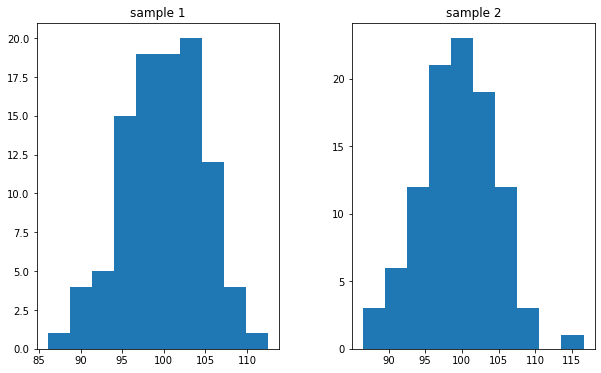

In [10]:
d.hist(column=['sample 1', 'sample 2'], grid=False, figsize=(10,6))

/home/guilherme/Programs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/guilherme/Programs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

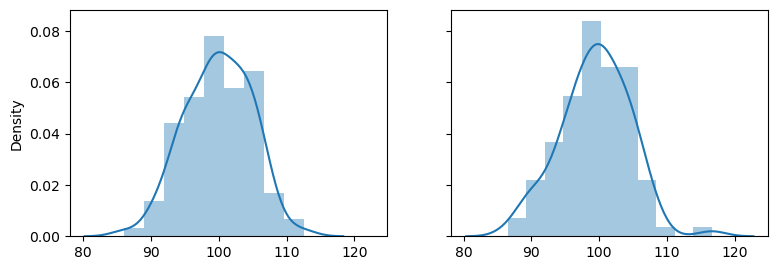

In [11]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, dpi=100, figsize=(9, 3))
sns.distplot(data_1, ax=ax[0])
sns.distplot(data_2, ax=ax[1])

In [12]:
np.mean(data_1), np.std(data_1)

(99.90594878674165, 4.853948260641175)

In [13]:
np.mean(data_2), np.std(data_2)

(99.42066834857962, 5.108341947845701)

### Wilcoxon signed-rank test

In [14]:
# compare samples
stat, p = wilcoxon(data_1, data_2)
print(f'statistic = {stat:.2f}\np-value = {p:.4f}')

statistic = 2266.00
p-value = 0.3732


In [15]:
alpha = 0.05

# Fail to reject H0 (samples have the same distribution)
if p > alpha:
    print('Fail to reject H0 (samples have the same distribution)')
else:
    print('Reject H0 (samples come from different distributions)')

Fail to reject H0 (samples have the same distribution)


### One-way ANOVA test (F-statistic)
One way Anova checks if the variance between the groups is greater then the variance within groups, and computes the probability of observing this variance ratio using F-distribution.

In [16]:
stat, p = f_oneway(data_1, data_2)
print(f'statistic = {stat:.2f}\np-value = {p:.4f}')

statistic = 0.47
p-value = 0.4940


In [17]:
alpha = 0.05

# Fail to reject H0 (samples have the same distribution)
if p > alpha:
    print('Fail to reject H0 (samples have the same distribution)')
else:
    print('Reject H0 (samples come from different distributions)')

Fail to reject H0 (samples have the same distribution)


### Levene's variance test

In [18]:
stat, p = levene(data_1, data_2)
print(f'statistic = {stat:.2f}\np-value = {p:.4f}')

statistic = 0.02
p-value = 0.9018


In [19]:
alpha = 0.05

# Fail to reject H0 (samples have the same distribution)
if p > alpha:
    print('Fail to reject H0 (samples have the same distribution)')
else:
    print('Reject H0 (samples come from different distributions)')

Fail to reject H0 (samples have the same distribution)
